# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
df = pd.read_csv('yulu_rental.csv')

In [39]:
# Перетворення datetime у правильний формат
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

In [40]:
rent_data = df

## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [41]:
print(f"Кількість рядків: {df.shape[0]}")
print(f"Кількість стовпців: {df.shape[1]}")
rent_data.head()

Кількість рядків: 10886
Кількість стовпців: 19


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,1,52,5,Saturday,2011,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,1,52,5,Saturday,2011,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,1,52,5,Saturday,2011,1,4


** ПОГОДИННИЙ рівень деталізації

## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


In [42]:
daily_counts = rent_data['count'].resample('D').sum()

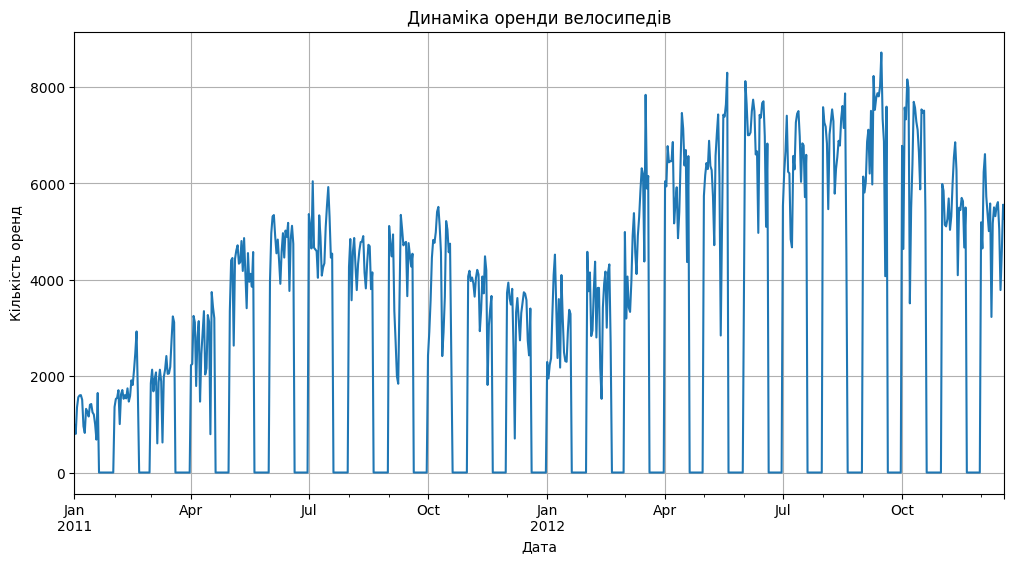

In [43]:
daily_counts.plot(
    figsize=(12, 6),
    title='Динаміка оренди велосипедів',
    grid=True,
    xlabel='Дата',
    ylabel='Кількість оренд'
)
plt.show()

In [44]:
zero_days = daily_counts[daily_counts == 0]
print(f"Днів з нульовими орендами: {len(zero_days)}")
print(zero_days.head())

Днів з нульовими орендами: 263
datetime
2011-01-20    0
2011-01-21    0
2011-01-22    0
2011-01-23    0
2011-01-24    0
Name: count, dtype: int64


In [45]:
filtered_counts = daily_counts[daily_counts.index.day < 19]

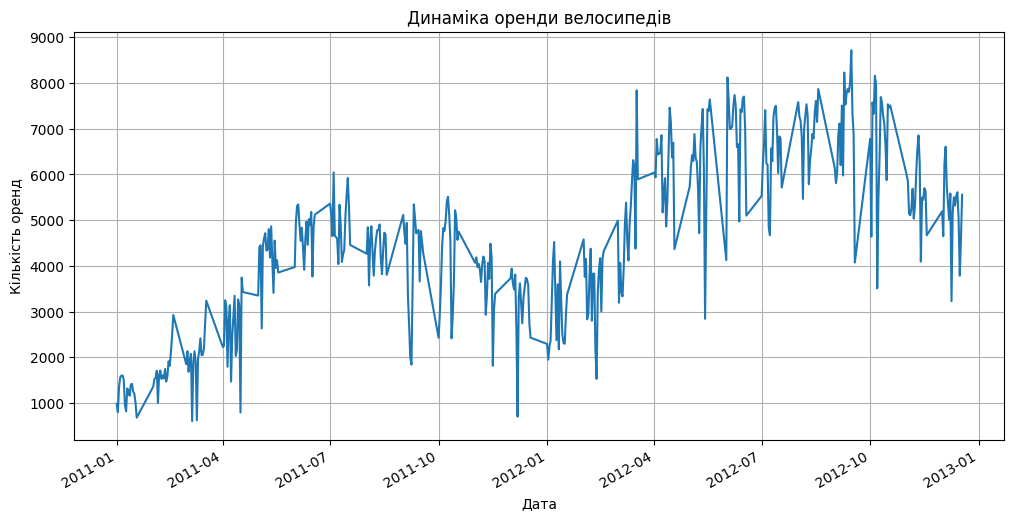

In [46]:
filtered_counts.plot(
    figsize=(12, 6),
    title='Динаміка оренди велосипедів',
    grid=True,
    xlabel='Дата',
    ylabel='Кількість оренд'
)
plt.show()

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
На графіку видно "заломи" до нуля, що спричинено відсутністю данних в датасеті в окремих днях. При використанні функції resample('D').sum() автоматично ставиться 0. За допомогою коду перевірили чи дійсно в наданому датасеті є дні в яких відсутні дані по оренді велосипедів. В датасеті дійсно відсутні дані по оренді починаючи з 20 числа кожного місяця, що показано на графіку як "заломи". Щоб прибрати заломи можна відфільтрувати дані, та вивести лише дані які містяться в період з 01 числа по 19 число кожного місяця. Або можна вибрати в колонці Count == 0, тобто дати в який кількість орендованих велосипедів менше 0 не будуть включатися в аналіз з датасету.
2. Які загальні тенденції ви бачите на графіку?
На графіку спостерігається загальна тенденція до росту кількості оренди велосипедів. З початку 2011 року зростає кількість оренди велосипедів
3. Чи помітні якісь сезонні коливання?
Так, на графіку помітні сезонні коливання: весною та влітку зростає кількість оренди велосипедів, осінь та зима знижується.  Це пов'язано з погодними умовами, комфортом та безпекою пересування на велосипеді.
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?
Так, на графіку були вказані аномально низькі значення - це "заломи",  які ми прибрали через відсутність данних. Також після очищення даних на графіку все рівно залишилися періоди з аномально низьким знаяеннями, це може бути пов'язано з поганими погодними умовами,  а також значення аномально високі, що може бути пов'язано з вихідними, святами, гарною погодою,  якщо це туристичне місто, то можливо потік туристів,  які брали в оренду велосипеди для прогулянок. Ці значення потрібно розкривати додатковим аналізом для перевірки гіпотез


## Завдання 2: Аналіз сезонності (Bar Plot)

**Завдання:**
Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами. Додайте підписи осей і заголовок.

Просунуте доповнення:
1. Позначте сезони не числом, а назвою на візуалізації.
2. Додайте підписи над стовпцями зі значеннями в кожному стовпці.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В який сезон найбільша середня кількість оренди велосипедів?
2. Як ви можете пояснити таку сезонну закономірність?
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним сезоном?

In [47]:
season_names = {1: 'Зима', 2: 'Весна', 3: 'Літо', 4: 'Осінь'}
season_avg = rent_data.groupby('season')['count'].mean()
season_avg.index = season_avg.index.map(season_names)

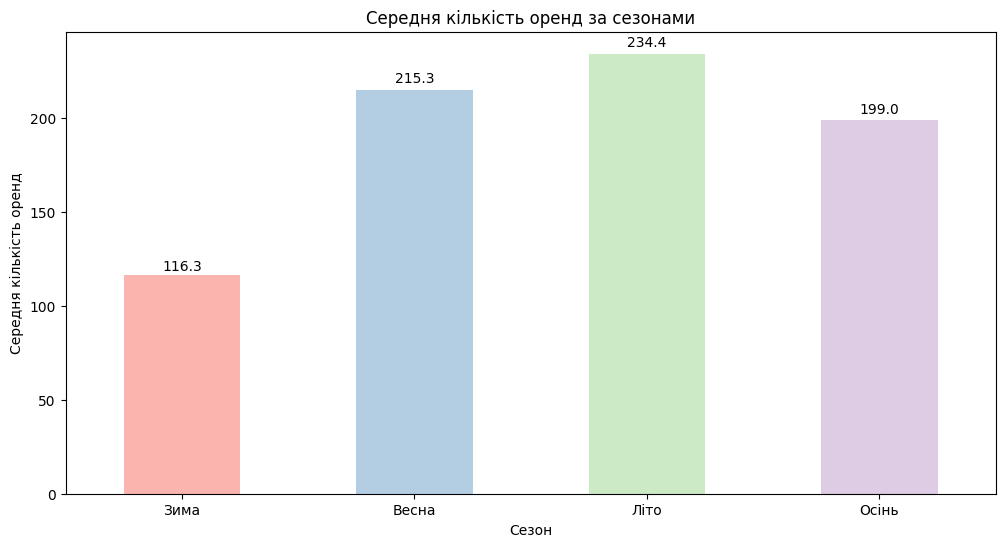

In [48]:
bars = season_avg.plot.bar(
    figsize=(12,6),
    title='Середня кількість оренд за сезонами',
    xlabel='Сезон',
    ylabel='Середня кількість оренд',
    color=plt.cm.Pastel1.colors
)
for bar in bars.patches:
    height = bar.get_height()
    bars.text(
        bar.get_x() + bar.get_width() / 2,
        height * 1.01,
        f'{height:.1f}',
        ha='center',
        va='bottom'    )
plt.xticks(rotation=0)
plt.show()

In [49]:
max_avg = season_avg.max()
min_avg = season_avg.min()
ratio = max_avg / min_avg
print(f'Оренда в найпопулярнішому сезоні у {ratio:.2f} разів більша, ніж у найменш популярному.')

Оренда в найпопулярнішому сезоні у 2.01 разів більша, ніж у найменш популярному.


In [50]:
clear_days = rent_data[rent_data['weather'] == 1]
clear_by_season = clear_days['season'].value_counts().sort_index()

print(clear_by_season)

season
1    1759
2    1801
3    1930
4    1702
Name: count, dtype: int64


Найбільший попит на оренду велосипедів це сезон 3 - Літо. 
Це пояснюється бульш сприятливими погодними умовами,  оскільки влітку не так сильно дощить, більше ясних днів, що сприяє більшому попиту на оренду велосипедів.  Це підтверджує також і кількість  погодних умов з позначкою "ЯСНО", в сезоні 3 їх найбільше 1930

## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


In [51]:
monthly_avg = rent_data.groupby('month')['count'].mean()
months = ['Січ', 'Лют', 'Бер', 'Квіт', 'Трав', 'Черв',
          'Лип', 'Серп', 'Вер', 'Жовт', 'Лист', 'Груд']

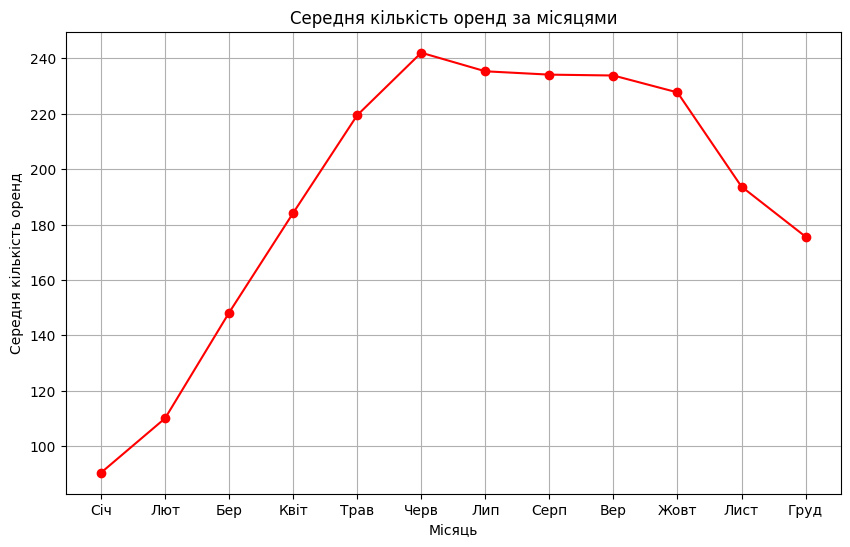

In [52]:
monthly_avg.plot(
    kind='line',
    marker='o',
    color='red',
    figsize=(10, 6),
    title='Середня кількість оренд за місяцями',
    xlabel='Місяць',
    ylabel='Середня кількість оренд',
    grid=True
)
import matplotlib.pyplot as plt
plt.xticks(ticks=range(1, 13), labels=months)

plt.show()

1. Пік оренди велосипедів в червні,  трішки знижується в липні та утримує показник на рівні липень, серпень та вересень. З жовтня вже маємо спад оренди. Найнижчий показник оренди в січні.
2. Так данний графік підтверджує закономірність попереднього завдання, що в сезон 3 -Літо найвищий попит на оренду велосипедів.
3. Клімат — ключовий фактор, оскільки це пов'язано з комфортом та безпекою при поїздках на велосипеді:
Взимку — холод, сніг, слизько як результат менше поїздок.
Весна та осінь — дощі, прохолода спостерігаємо середню активність попиту на оренду велосипедів.
Влітку — хороша погода, менше дощів та прохолоди, більш комфортний період для поїздок, тому спостерігаємо максимальний попит на оренду велосипедів.

## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму з часткою записів за погодними умовами
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

In [53]:
weather = rent_data['weather'].value_counts().sort_index()

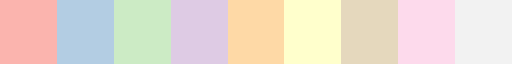

In [54]:
plt.cm.Pastel1

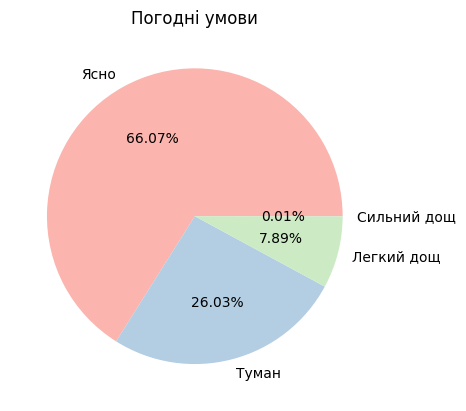

In [55]:
weather.plot.pie(
     autopct='%1.2f%%',
     labels=['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ'],
     title='Погодні умови',
     ylabel='',
     colors=plt.cm.Pastel1.colors
);

In [56]:
labels = ['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ']
colors = ['yellow', 'lightblue', 'gray', 'blue']

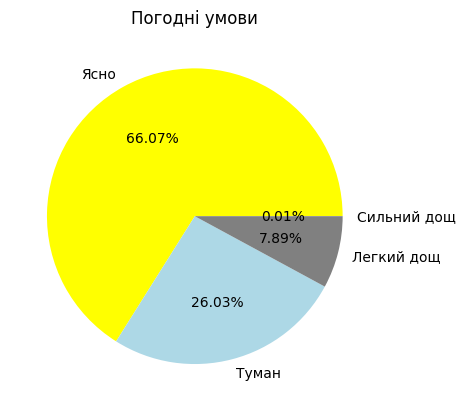

In [57]:
weather.plot.pie(
     autopct='%1.2f%%',
     labels=labels,
     colors=colors,
     title='Погодні умови',
     ylabel='',
);

В датасеті переважає ясна погода. Відсоток більше 66%
Так в датасеті присутні дні з сильним дощем, але частка зовсім незначна, 0,01%.

На мою думку, погодні умови сильно впливають на попит оренди велосипедів, оскільки в дощ, бажаючих орендувати велосипеди буде зовсім мало або взагалі може не бути, в туман та сильну спеку також бажаючих буде мало, а от в ясну та не досить спекотну погоду бажаючих орендувати велосипеди буде велика кількість

## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

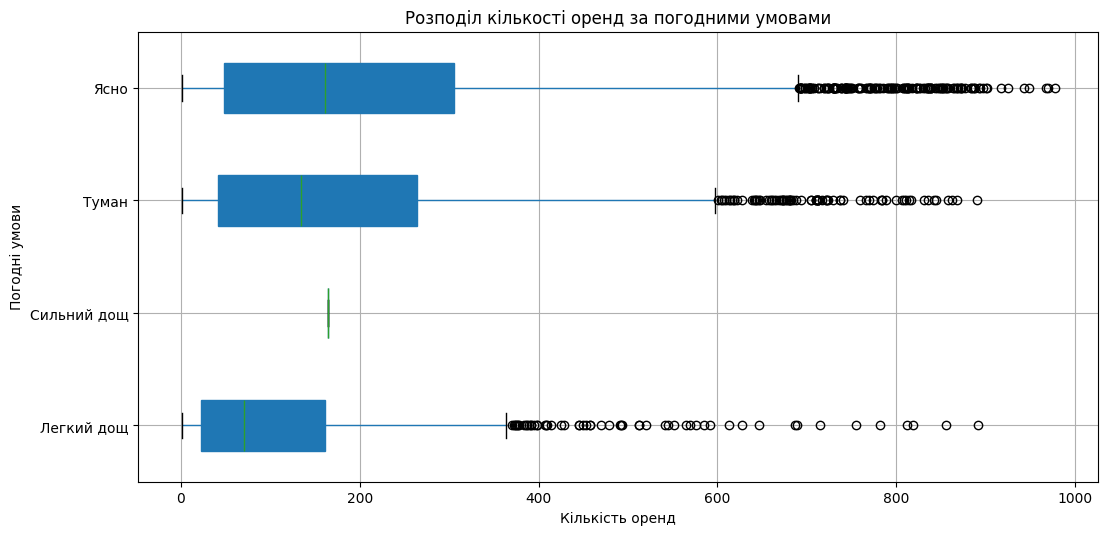

In [58]:
weather_labels = {1: 'Ясно', 2: 'Туман', 3: 'Легкий дощ', 4: 'Сильний дощ'}
rent_data['weather_label'] = rent_data['weather'].map(weather_labels)

boxplot = df.boxplot(
    column='count',
    by='weather_label',
    vert=False, 
    figsize=(12, 6),
    grid=True,
    patch_artist=True 
)

plt.title('Розподіл кількості оренд за погодними умовами')
plt.suptitle('') 
plt.xlabel('Кількість оренд')
plt.ylabel('Погодні умови')

plt.show()

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
Найбільший розкид даних за погодних умов "Ясно".  Це ми можемо побачити по довжині box та вусів, тому що вони охоплюють найбільшу кількість значень. Також мають місце багато викидів.
2. Чи є викиди (outliers) в даних? При якій погоді?
Так, викиди на графіку ми можемо побачити за всих погодних умовах, окрім "Сильний дощ"
3. При якій погоді медіанне значення оренди найвище?
Медіанне значення оренд найвище при ясній погоді

Очікуваний результат:

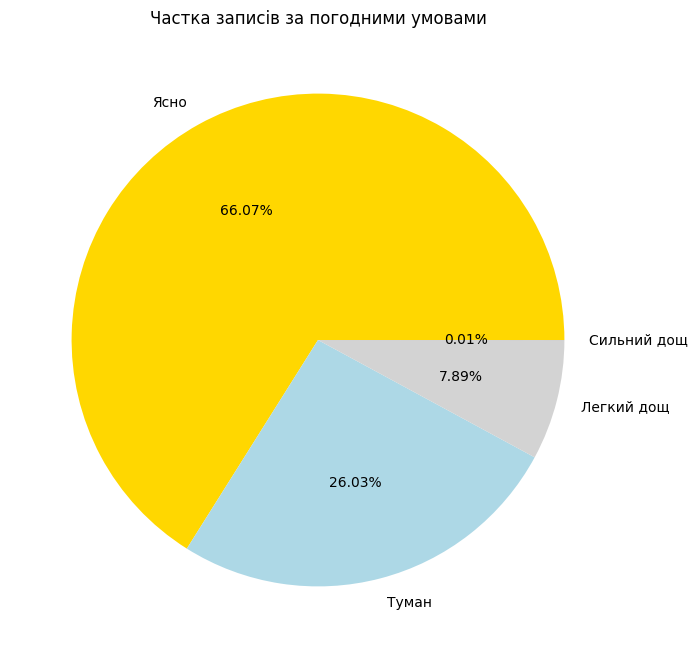

## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

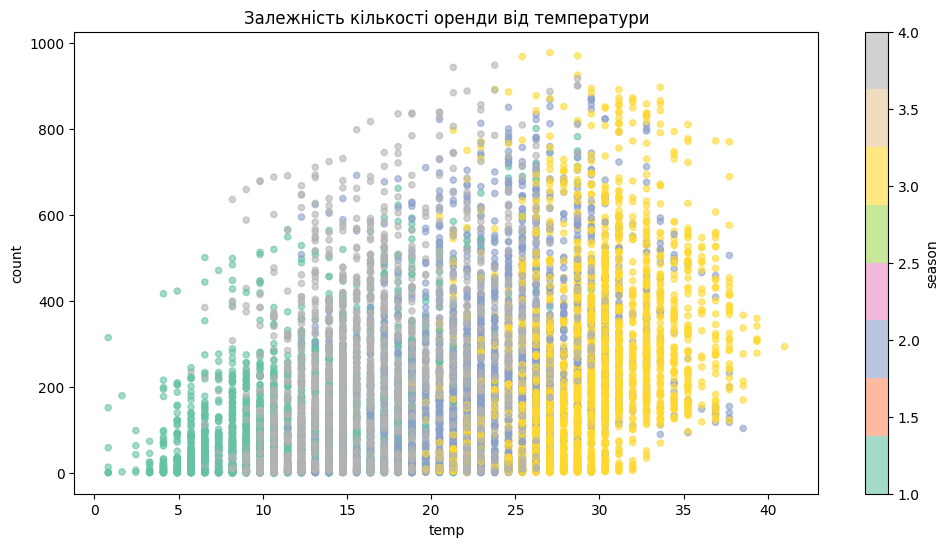

In [59]:
rent_data.plot.scatter(
    x='temp',
    y='count',
    c='season',          
    colormap='Set2',   
    alpha=0.6,
    figsize=(12, 6),
    title='Залежність кількості оренди від температури'
)
plt.show()

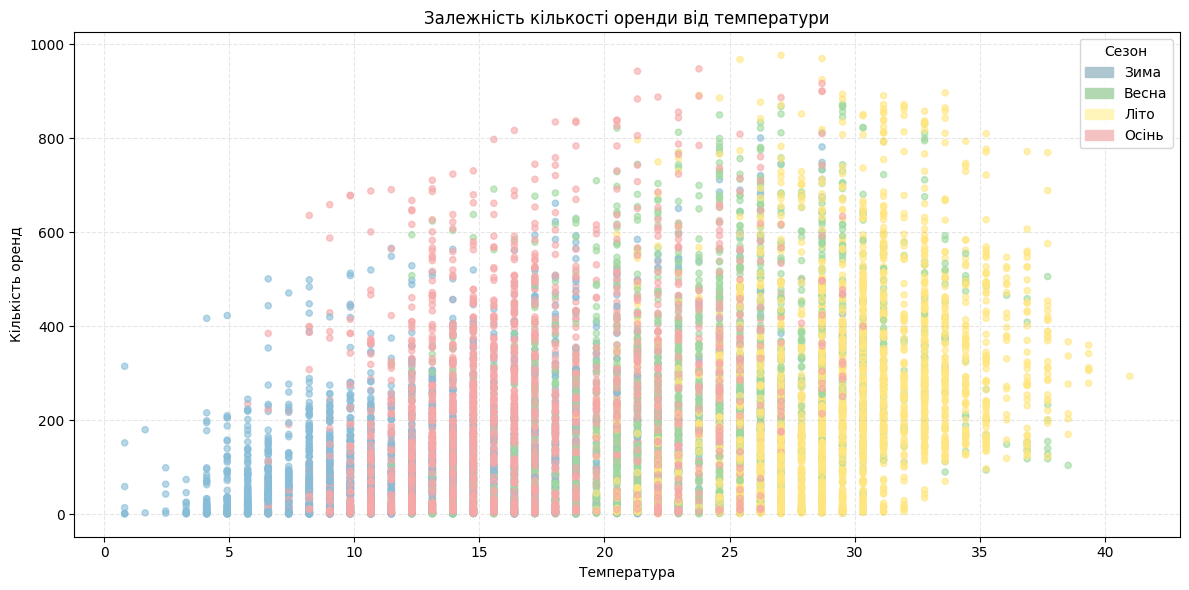

In [ ]:
import matplotlib.patches as mpatches 

pastel_colors = {
    1: '#87bdd8',  # Зима
    2: '#9fd99f',  # Весна
    3: '#ffe680',  # Літо
    4: '#f7a8a8'   # Осінь
}

rent_data.plot.scatter(
    x='temp',
    y='count',
    c=rent_data['season'].map(pastel_colors),
    alpha=0.6,
    figsize=(12, 6),
    title='Залежність кількості оренди від температури'
)

legend_patches = [
    mpatches.Patch(color='#aec6cf', label='Зима'),
    mpatches.Patch(color='#b2d8b2', label='Весна'),
    mpatches.Patch(color='#fff5ba', label='Літо'),
    mpatches.Patch(color='#f4c2c2', label='Осінь')
]
plt.legend(handles=legend_patches, title='Сезон')

plt.xlabel('Температура')
plt.ylabel('Кількість оренд')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

На графіку зобрадена позитивна кореляція: зі зростанням температури збільшується кількість оренд. При вищих температурах точки графіка розташовані на більшій висоті по осі count і низька активність при низьких температурах: при температурі нижче 10°C кількість оренд  не перевищує 200–300.
Найбільша кількість оренд — при температурі близько 25–30°C, але після 35°C активність трохи зменшується, бо в сильну спеку не досить комфортно користуватися велосиедом.
Так, є чітка позитивна залежність між температурою та кількістю оренд велосипедів, особливо виражена у весняно-літній період. Коли найбільш комфортна по температурі погода та з меншою кількістью дощів.

## Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

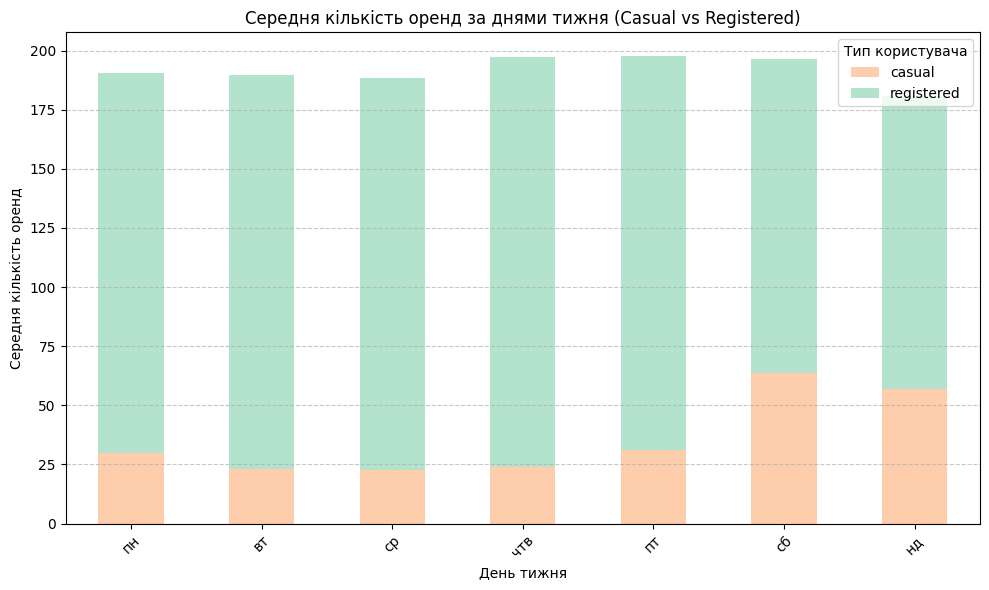

In [87]:
avg_rentals = rent_data.groupby('weekday_num')[['casual', 'registered']].mean()
weekday_num = {
  0: 'пн', 1: 'вт', 2: 'ср', 3: 'чтв', 4: 'пт', 5: 'сб', 6: 'нд'
}
avg_rentals.index = avg_rentals.index.map(weekday_num)

days_order = ['пн', 'вт', 'ср', 'чтв', 'пт', 'сб', 'нд']
avg_rentals = avg_rentals.reindex(days_order)
colors = plt.cm.Pastel2.colors

# Малюємо stacked bar chart pandas
ax = avg_rentals.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color= [colors[1], colors[0]],
    title='Середня кількість оренд за днями тижня (Casual vs Registered)'
)

ax.set_xlabel('День тижня')
ax.set_ylabel('Середня кількість оренд')
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend(title='Тип користувача')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. В які дні тижня більше оренд від зареєстрованих користувачів?
Це робочі дні — Пн–Пт.

2. Як ви можете пояснити таку різницю в поведінці?
Зареєстровані користувачі — це,можливо, мешканці міста, які регулярно їздять на велосипеді особливо в робочі дні, щоб приїхати на роботу.
Випадкові (casual) користувачі збільшується оренда на вихідних і можливо припустити, що це можуть бути туристи, а також люди, якіне використовують велосипед у повсякденному житті постійно, а лише бере його на прокат як вид розваги чи відпочитнку,  і зазвичай це на вхідні, тому частка випадкових оренд вища на вихідних ніж в будні

